# High Level API

In this notebook, we will walk through the high level nxviz API.

The intent here is to provide a convenient (albeit restrictive) way
to build graph visualizations for exploratory analysis purposes.
Our goal is to help you declaratively visualize a network
using one of the rational visualizations provided.
The design is intentionally quite restrictive;
customizations are limited to what you can compose together.

You should treat these the way you would use the plotting package `seaborn`:
to get you a quick overview of your data
without being bogged down by the details of how things are placed on the screen.
If you want finer-grained control,
then you may wish to drop down to the mid-level or low-level API instead.

## How to read this notebook

Treat this notebook as a gallery of examples.
As with all declarative APIs, it's important to know the structure of the graph.
We're showing you the exact source code for graph construction,
and the graph's corresponding node and edge tables,
to make things easier to read.

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import nxviz as nv
from nxviz import annotate
import networkx as nx
from random import choice
from nxviz.plots import respine, despine, rescale

## Example Graph

We're going to use an example graph, the erdos-renyi graph,
to illustrate.

### Source code


In [32]:
G = nx.erdos_renyi_graph(n=71, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = choice(["a", "b", "c"])
    G.nodes[n]["value"] = np.random.exponential()

np.random.seed(44)
for u, v, d in G.edges(data=True):
    G.edges[u, v]["edge_value"] = np.random.exponential()

### Node table

In [45]:
from nxviz.utils import node_table, edge_table

node_table(G)

,group,value
0,c,1.476922
1,c,1.094255
2,a,0.520576
3,c,3.543884
4,c,1.571604
...,...,...
66,c,0.882293
67,a,2.236440
68,b,4.831346
69,c,0.120235


In [46]:
edge_table(G)

,edge_value,source,target
0,1.800854,0,7
1,0.110704,0,11
2,1.365083,0,15
3,0.447070,0,63
4,0.445211,1,3
...,...,...,...
258,3.543884,59,66
259,1.571604,61,70
260,0.167018,63,64
261,0.613514,64,70


## Hive Plot

Here's a Hive Plot view of the graph.

The Hive plot is appropriate here,
because we have one categorical variables with three values
by which we can group our nodes.

Here's one example where we group the nodes by their `group` attribute,
sort and colour them by their `value` attribute,
and set the transparency of an aged based on the edge's `edge_value` attribute.
We also annotate the grouping on the hive plot.

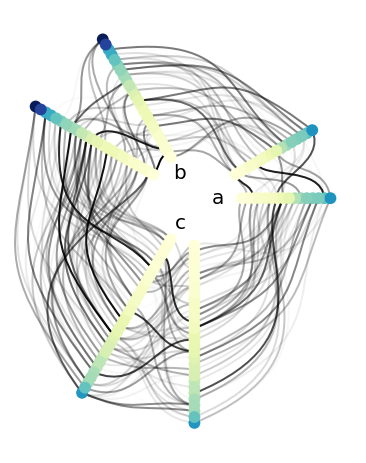

In [36]:
ax = nv.hive(G, group_by="group", sort_by="value", node_color_by="value", edge_alpha_by="edge_value")
annotate.hive_group(G, group_by="group")

Here's an alternative visualization where
we group and colour the nodes by their `group` attribute,
ignoring the `value` attribute on the nodes
and the `edge_value` attribute on the edges.

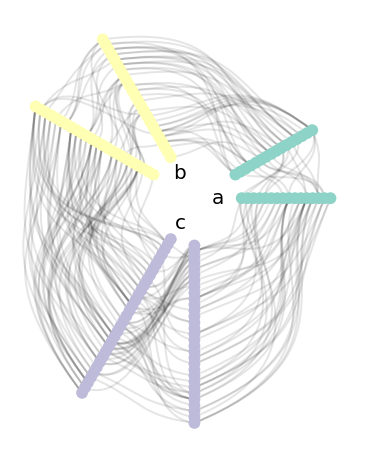

In [40]:
ax = nv.hive(G, group_by="group", node_color_by="group")
annotate.hive_group(G, group_by="group")

The same consistent API applies to the other plot types.

## Arc Plot

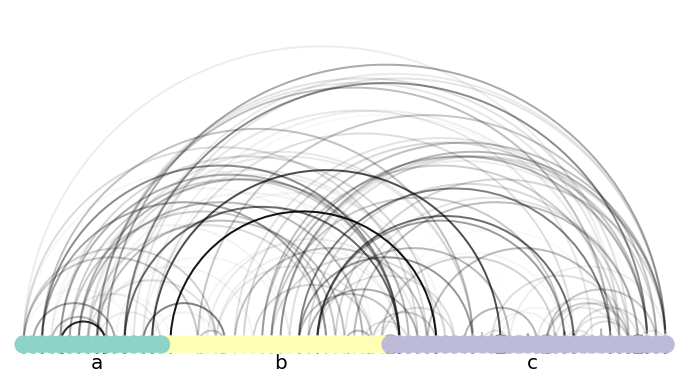

In [44]:
ax = nv.arc(G, group_by="group", node_color_by="group", edge_alpha_by="edge_value")
annotate.arc_group(G, group_by="group", ha="center", rotation=0)

## Circos Plot

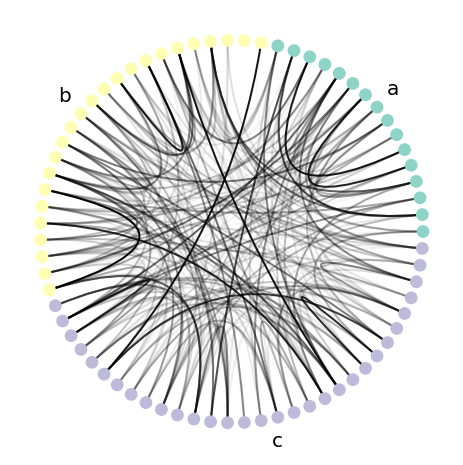

In [48]:
ax = nv.circos(G, group_by="group", node_color_by="group", edge_alpha_by="edge_value")
annotate.circos_group(G, group_by="group")